In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_X = heart.drop('DEATH_EVENT', axis=1)
heart_y = heart['DEATH_EVENT']

In [ ]:
num_cols = heart_X.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
imputer = SimpleImputer(strategy='median')
heart_X_imputed = heart_X.copy()
heart_X_imputed[num_cols] = imputer.fit_transform(heart_X[num_cols])

In [ ]:
scaler = StandardScaler()
heart_X_scaled = heart_X_imputed.copy()
heart_X_scaled[num_cols] = scaler.fit_transform(heart_X_imputed[num_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(heart_X_scaled, heart_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### 1. Bagging Classifier

In [ ]:
bag = BaggingClassifier(n_estimators=100, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_bag = accuracy_score(y_test, y_pred)
precision_bag = precision_score(y_test, y_pred)
recall_bag = recall_score(y_test, y_pred)
f1_bag = f1_score(y_test, y_pred)
print("Accuracy of Bagging Classifier: ", accuracy_bag)
print("Precision of Bagging Classifier: ", precision_bag)
print("Recall of Bagging Classifier: ", recall_bag)
print("F1 Score of Bagging Classifier: ", f1_bag)

Accuracy of Bagging Classifier:  0.7166666666666667
Precision of Bagging Classifier:  0.7
Recall of Bagging Classifier:  0.56
F1 Score of Bagging Classifier:  0.6222222222222222


### 2. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred1)
precision_rf = precision_score(y_test, y_pred1)
recall_rf = recall_score(y_test, y_pred1)
f1_rf = f1_score(y_test, y_pred1)
print("Accuracy of Random Forest Classifier: ", accuracy_rf)
print("Precision of Random Forest Classifier: ", precision_rf)
print("Recall of Random Forest Classifier: ", recall_rf)
print("F1 Score of Random Forest Classifier: ", f1_rf)

Accuracy of Random Forest Classifier:  0.75
Precision of Random Forest Classifier:  0.8571428571428571
Recall of Random Forest Classifier:  0.48
F1 Score of Random Forest Classifier:  0.6153846153846154


### 3. Adaboost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred2 = ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred2)
precision_ada = precision_score(y_test, y_pred2)
recall_ada = recall_score(y_test, y_pred2)
f1_ada = f1_score(y_test, y_pred2)
print("Accuracy of Adaboost Classifier: ", accuracy_ada)
print("Precision of Adaboost Classifier: ", precision_ada)
print("Recall of Adaboost Classifier: ", recall_ada)
print("F1 Score of Adaboost Classifier: ", f1_ada)

Accuracy of Adaboost Classifier:  0.7333333333333333
Precision of Adaboost Classifier:  0.7647058823529411
Recall of Adaboost Classifier:  0.52
F1 Score of Adaboost Classifier:  0.6190476190476191


### 4. Gradientboost Classifier

In [ ]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad.fit(X_train, y_train)
y_pred3 = grad.predict(X_test)
accuracy_grad = accuracy_score(y_test, y_pred3)
precision_grad = precision_score(y_test, y_pred3)
recall_grad = recall_score(y_test, y_pred3)
f1_grad = f1_score(y_test, y_pred3)
print("Accuracy of Gradientboost Classifier: ", accuracy_grad)
print("Precision of Gradientboost Classifier: ", precision_grad)
print("Recall of Gradientboost Classifier: ", recall_grad)
print("F1 Score of Gradientboost Classifier: ", f1_grad)

Accuracy of Gradientboost Classifier:  0.7166666666666667
Precision of Gradientboost Classifier:  0.75
Recall of Gradientboost Classifier:  0.48
F1 Score of Gradientboost Classifier:  0.5853658536585366


### 5. Voting Classifier

In [ ]:
voting = VotingClassifier(estimators=[('decision', DecisionTreeClassifier(criterion="gini")), ('rf', rf), ('svc', SVC())], voting='hard', verbose=True)
voting.fit(X_train, y_train)
y_pred4 = voting.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred4)
precision_coting = precision_score(y_test, y_pred4)
recall_voting = recall_score(y_test, y_pred4)
f1_voting = f1_score(y_test, y_pred4)
print("Accuracy of Voting Classifier: ", accuracy_voting)
print("Precision of Voting Classifier: ", precision_coting)
print("Recall of Voting Classifier: ", recall_voting)
print("F1 Score of Voting Classifier: ", f1_voting)

[Voting] ................. (1 of 3) Processing decision, total=   0.0s
[Voting] ....................... (2 of 3) Processing rf, total=   0.7s
[Voting] ...................... (3 of 3) Processing svc, total=   0.0s
Accuracy of Voting Classifier:  0.75
Precision of Voting Classifier:  0.8571428571428571
Recall of Voting Classifier:  0.48
F1 Score of Voting Classifier:  0.6153846153846154


### 6. Stacking Classifier

In [ ]:
stacking = StackingClassifier(estimators=
    [('decision', DecisionTreeClassifier(criterion="gini")),
      ('rf', rf),
      ('svc', SVC())],
      final_estimator=LogisticRegression(max_iter=100), cv = 5)
stacking.fit(X_train, y_train)
y_pred5 = stacking.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred5)
precision_stacking = precision_score(y_test, y_pred5)
recall_stacking = recall_score(y_test, y_pred5)
f1_stacking = f1_score(y_test, y_pred5)
print("Accuracy of Stacking Classifier: ", accuracy_stacking)
print("Precision of Stacking Classifier: ", precision_stacking)
print("Recall of Stacking Classifier: ", recall_stacking)
print("F1 Score of Stacking Classifier: ", f1_stacking)

Accuracy of Stacking Classifier:  0.7833333333333333
Precision of Stacking Classifier:  0.875
Recall of Stacking Classifier:  0.56
F1 Score of Stacking Classifier:  0.6829268292682927


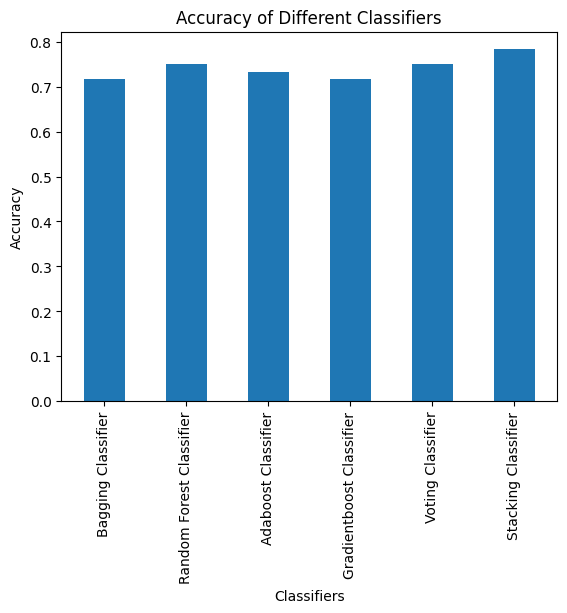

In [ ]:
accuracies = ["Bagging Classifier", "Random Forest Classifier", "Adaboost Classifier", "Gradientboost Classifier", "Voting Classifier", "Stacking Classifier"]
accuracies_scores = [accuracy_bag, accuracy_rf, accuracy_ada, accuracy_grad, accuracy_voting, accuracy_stacking]
import matplotlib.pyplot as plt
plt.bar(accuracies, accuracies_scores, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

### Confusion Matrices

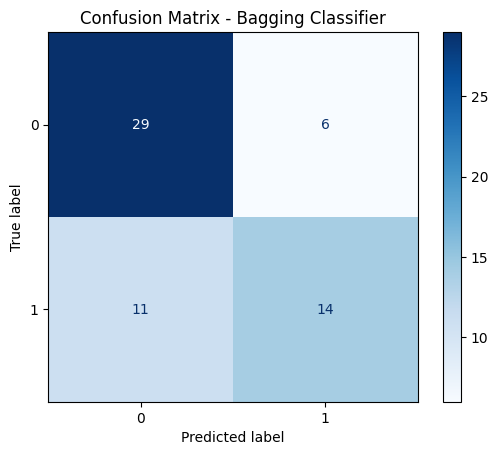

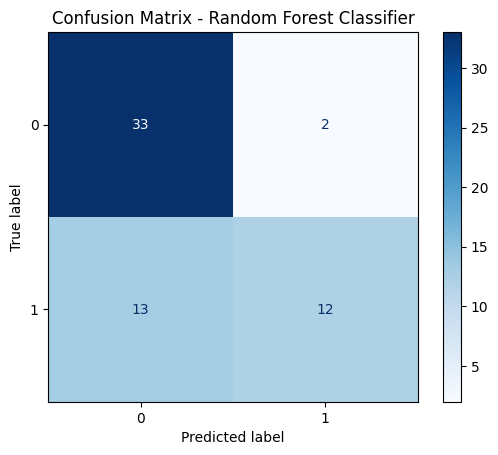

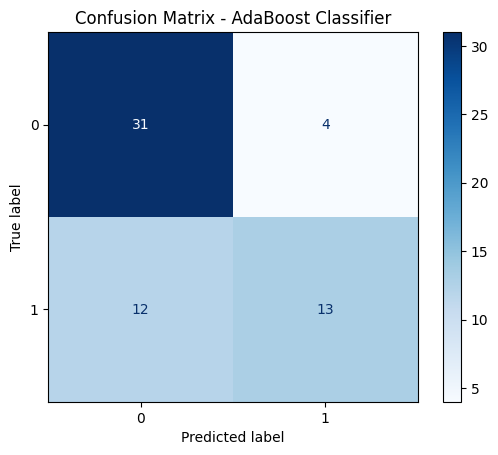

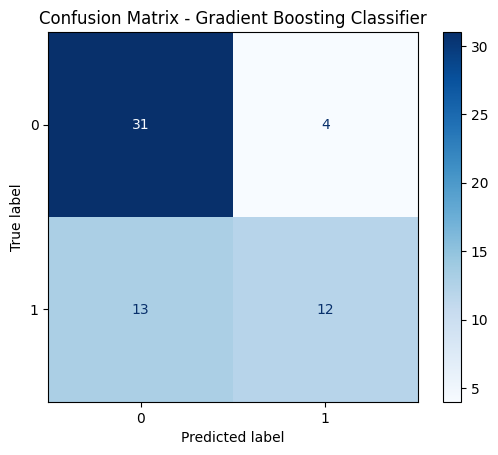

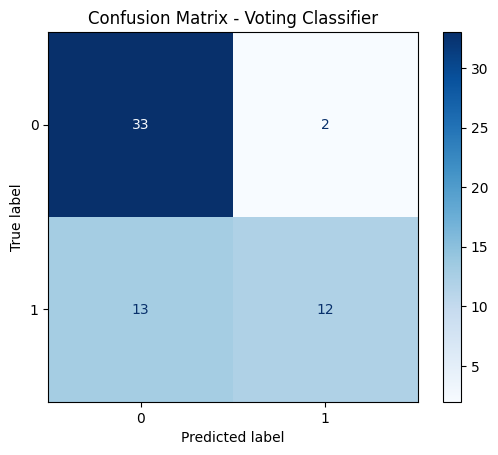

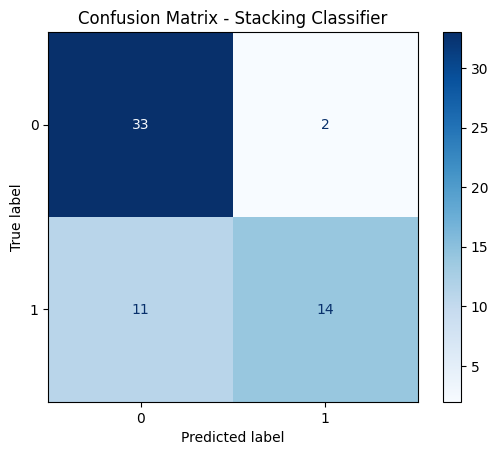

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


y_preds = {
    "Bagging Classifier": y_pred,
    "Random Forest Classifier": y_pred1,
    "AdaBoost Classifier": y_pred2,
    "Gradient Boosting Classifier": y_pred3,
    "Voting Classifier": y_pred4,
    "Stacking Classifier": y_pred5
}


for name, y_pred in y_preds.items():
    matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### ROC Curves

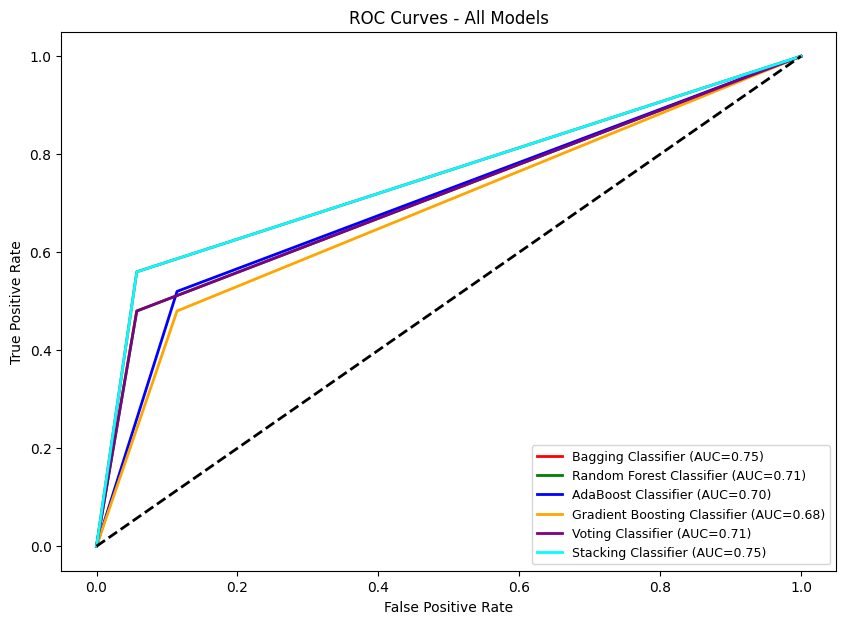

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt


y_preds = {
    "Bagging Classifier": y_pred,
    "Random Forest Classifier": y_pred1,
    "AdaBoost Classifier": y_pred2,
    "Gradient Boosting Classifier": y_pred3,
    "Voting Classifier": y_pred4,
    "Stacking Classifier": y_pred5
}


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 7))
colors = cycle(["red", "green", "blue", "orange", "purple", "cyan", "brown"])

for (name, probas), color in zip(y_preds.items(), colors):

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probas.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - All Models")
plt.legend(loc="lower right", fontsize=9)
plt.show()

#### REGRESSION

In [ ]:
heart_reg_X = heart.drop('time', axis=1)
heart_reg_y = heart['time']
X_train, X_test, y_train, y_test = train_test_split(heart_reg_X, heart_reg_y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### 1. Bagging Regressor

In [ ]:
bagging = BaggingRegressor(n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred)
rmse_bagging = root_mean_squared_error(y_test, y_pred)
r2_bagging = r2_score(y_test, y_pred)
print("MSE of Bagging Regressor: ", mse_bagging)
print("RMSE of Bagging Regressor: ", rmse_bagging)
print("R2 Score of Bagging Regressor: ", r2_bagging)

MSE of Bagging Regressor:  4691.0856816666665
RMSE of Bagging Regressor:  68.49150079876091
R2 Score of Bagging Regressor:  0.14488740843427717


### 2. Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred1)
rmse_rf = root_mean_squared_error(y_test, y_pred1)
r2_rf = r2_score(y_test, y_pred1)
print("MSE of Random Forest Regressor: ", mse_rf)
print("RMSE of Random Forest Regressor: ", rmse_rf)
print("R2 Score of Random Forest Regressor: ", r2_rf)

MSE of Random Forest Regressor:  4728.809983333334
RMSE of Random Forest Regressor:  68.76634339074118
R2 Score of Random Forest Regressor:  0.13801084988211498


### 3. AdaBoost Regressor

In [ ]:
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred2 = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred2)
rmse_ada = root_mean_squared_error(y_test, y_pred2)
r2_ada = r2_score(y_test, y_pred2)
print("MSE of AdaBoost Regressor: ", mse_ada)
print("RMSE of AdaBoost Regressor: ", rmse_ada)
print("R2 Score of AdaBoost Regressor: ", r2_ada)

MSE of AdaBoost Regressor:  4594.028548772149
RMSE of AdaBoost Regressor:  67.77926341272934
R2 Score of AdaBoost Regressor:  0.16257942731249198


### 4. Gradient Boost Regressor

In [ ]:
grad = GradientBoostingRegressor(n_estimators=100, random_state=42)
grad.fit(X_train, y_train)
y_pred3 = grad.predict(X_test)
mse_grad = mean_squared_error(y_test, y_pred3)
rmse_grad = root_mean_squared_error(y_test, y_pred3)
r2_grad = r2_score(y_test, y_pred3)
print("MSE of Gradient Boost Regressor: ", mse_grad)
print("RMSE of Gradient Boost Regressor: ", rmse_grad)
print("R2 Score of Gradient Boost Regressor: ", r2_grad)

MSE of Gradient Boost Regressor:  5345.767083869843
RMSE of Gradient Boost Regressor:  73.11475284694494
R2 Score of Gradient Boost Regressor:  0.025549082836066606


### 5. Voting Regressor

In [ ]:
voting = VotingRegressor(estimators=[
    ('decision', DecisionTreeRegressor(criterion="squared_error")),
    ('rf', rf),
    ('svr', SVR())])
voting.fit(X_train, y_train)
y_pred4 = voting.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred4)
rmse_voting = root_mean_squared_error(y_test, y_pred4)
r2_voting = r2_score(y_test, y_pred4)
print("MSE of Voting Regressor: ", mse_voting)
print("RMSE of Voting Regressor: ", rmse_voting)
print("R2 Score of Voting Regressor: ", r2_voting)

MSE of Voting Regressor:  5059.713788971098
RMSE of Voting Regressor:  71.13166516377287
R2 Score of Voting Regressor:  0.07769218806280276


### 6. Stacking Regressor

In [ ]:
stacking = StackingRegressor(estimators=[
    ('decision', DecisionTreeRegressor(criterion="squared_error")),
    ('rf', rf),
    ('svr', SVR())],
    final_estimator=LinearRegression())
stacking.fit(X_train, y_train)
y_pred5 = stacking.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred5)
rmse_stacking = root_mean_squared_error(y_test, y_pred5)
r2_stacking = r2_score(y_test, y_pred5)
print("MSE of Stacking Regressor: ", mse_stacking)
print("RMSE of Stacking Regressor: ", rmse_stacking)
print("R2 Score of Stacking Regressor: ", r2_stacking)

MSE of Stacking Regressor:  4516.320126668386
RMSE of Stacking Regressor:  67.20357227609546
R2 Score of Stacking Regressor:  0.17674447453627729


### Mean Squared Errors Barplot

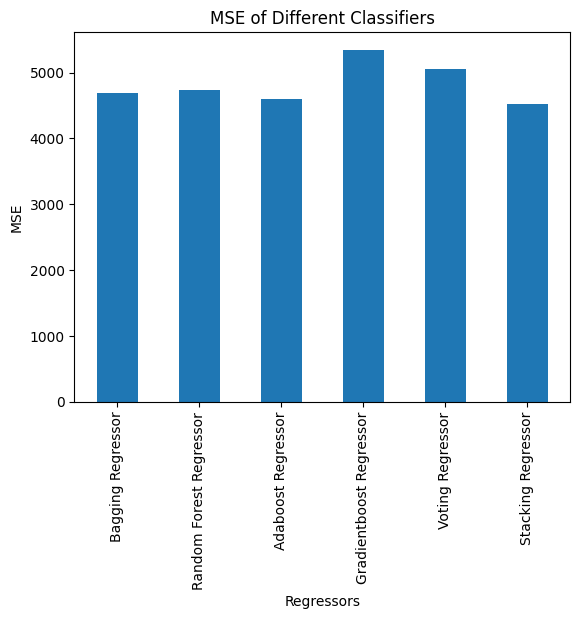

In [ ]:
regressors = ["Bagging Regressor", "Random Forest Regressor", "Adaboost Regressor", "Gradientboost Regressor", "Voting Regressor", "Stacking Regressor"]
mse = [mse_bagging, mse_rf, mse_ada, mse_grad, mse_voting, mse_stacking]
import matplotlib.pyplot as plt
plt.bar(regressors, mse, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Regressors')
plt.ylabel('MSE')
plt.title('MSE of Different Classifiers')
plt.show()